In [1]:
import numpy as np
import pandas as pd

In [2]:
A = np.random.random()
print(A)

0.9447492960449327


In [3]:
A = np.random.randint(10,size=3)
print(A)
print(np.random.random([10]))
print(np.random.ranf([2]))
print(np.random.uniform([0, 100, 3]))

[3 9 4]
[ 0.67114189  0.62250192  0.5843809   0.59609168  0.10815881  0.09343786
  0.98574194  0.19381439  0.20133652  0.57279222]
[ 0.19217136  0.8968645 ]
[ 0.46072649  9.40003334  1.61072114]


In [4]:
# creating simulated dataset
x1 = np.random.uniform(0, 100, 100)
x2 = np.random.uniform(0,100,100)
def bound(x):
    X= 50+(x-2*(x-20)+3*(x-50)**3/8000)
    return X
y = np.where(x2 > bound(x1),0,1)



In [39]:
# creating the Data Frame
df1 = pd.DataFrame(x1,columns=['x1'])
df2 = pd.DataFrame(x2,columns=['x2'])
df3 = pd.DataFrame(y,columns =['y'])
df = pd.concat([df1, df2,df3], axis=1)
print(df.head())

          x1         x2  y
0  17.307338   7.224827  1
1  35.461108  17.505836  1
2  60.036776  20.010052  1
3  39.223022  66.796637  0
4   3.301423  28.841200  1


In [28]:
y=df.iloc[:,2]
X =df.iloc[:,0:2]
print(X.head())

          x1         x2
0  17.307338   7.224827
1  35.461108  17.505836
2  60.036776  20.010052
3  39.223022  66.796637
4   3.301423  28.841200


In [29]:
from sklearn.svm import LinearSVC
svc= LinearSVC()
svc.fit(X,y)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [30]:
print(svc.coef_)

[[-0.01589481 -0.03499517]]


In [31]:
print(svc.intercept_)

[ 1.94732088]


In [51]:
y_pred =svc.predict(X)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0])

In [25]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline

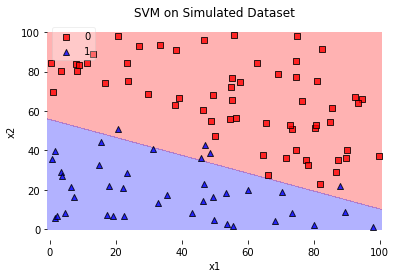

In [49]:
plot_decision_regions(X.values, y.values, clf=svc,
                      res=0.02, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM on Simulated Dataset')
plt.show()

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y, y_pred))
confusion_matrix(y,y_pred)


0.95


array([[60,  0],
       [ 5, 35]])